# Data Transforming

Above I coded the target, now I normalize the rest of the features to be able to start modeling.

In [ ]:
# Split independent features from target
X = data.drop('Health_Status', axis=1)
y = data['Health_Status']

In [ ]:
# Normalizing the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# MODELS

In [ ]:
# Splitting the data
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20)

## Data Balancing

NOTE: The modeling has been done without using balanced data, this data set is not that unbalanced.

In [ ]:
# See the balance before SMOTE
print('Health Status Balance:', Counter(ytrain))

# Apply SMOTE to train set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(xtrain, ytrain)

# VSee the balance after SMOTE
print('Health Status Balance After:', Counter(y_train_smote))

Health Status Balance: Counter({0: 345, 2: 270, 3: 122, 1: 63})
Health Status Balance After: Counter({0: 345, 3: 345, 2: 345, 1: 345})


# MODELING

## Auxiliar functions

I have created auxiliar functions to:
- Estimate the metrics and keep them.
- Graph the predictions in two scales, so the graph is a bit clearer.
- Estimate and graph the confussion matrix (adapted to multiclass target).
- Estimate and graph the prediction errors.
- Estimate the feature importances (only used in tree shaped models).
- Collect metrics in a list and show them in a dataframe.

### Model

In [ ]:
def model_metrics(classifier=None, model_name=None):

    # Classification Metrics
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    acc = accuracy_score(ytest,prediction)
    preci = precision_score(ytest, prediction, average='weighted')
    reca = recall_score(ytest, prediction, average='weighted')
    f1 = f1_score(ytest, prediction, average='weighted')
    cvs = cross_val_score(classifier,xtrain,ytrain,cv = cv).mean()

    # Print metrics
    print("Accuracy : ",'{0:.2%}'.format(acc))
    print("Precision : ",'{0:.2%}'.format(preci))
    print("Recall : ",'{0:.2%}'.format(reca))
    print("F1 Score : ",'{0:.2%}'.format(f1))
    print("Cross Validation Score : ",'{0:.2%}'.format(cvs))

    metrics.append({
        "Model": model_name,
        "Accuracy": acc,
        "Precision": preci,
        "Recall": reca,
        "F1 Score": f1,
        "Cross Validation Score": cvs
    })
    return prediction

### Predictions

In [ ]:
def graph_prediction(classifier=None):
    # Visualize the predictions
    x_ax = range(len(ytest))
    plt.plot(x_ax, ytest, label="original")
    plt.plot(x_ax, prediction, label="prediction")
    plt.title("Real data and prediction")
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.legend(loc='best', fancybox=True, shadow=True)
    plt.grid(True)
    plt.show()

    # Only the first 100 entries
    x_ax = range(100)
    plt.plot(x_ax, ytest[:100], label="original")
    plt.plot(x_ax, prediction[:100], label="prediction")
    plt.title("Real data and prediction")
    plt.xlabel('Sample Index')
    plt.ylabel('Escalated Objetive')
    plt.legend(loc='best', fancybox=True, shadow=True)
    plt.grid(True)
    plt.show()

### Model Evaluation

In [ ]:
def model_evaluation(classifier=None):

    # Confusion Matrix
    cm = confusion_matrix(ytest,classifier.predict(xtest))
    num_classes = len(np.unique(ytest))
    names = [f'Class {i}' for i in range(num_classes)]
    class_labels = {i: name for i, name in enumerate(names)}

    # Create labels
    labels = np.empty_like(cm, dtype=object)
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            labels[i, j] = str(cm[i, j])

    # Visualize confussion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    disp.plot(cmap=plt.cm.Blues)

    plt.title("Confusion Matrix")
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

In [ ]:
def model_errors(classifier=None):
    #  Cross Validation Predict
    cv_predictions = cross_val_predict(classifier, X, y, cv=5)

    # Create a dataframe with real values and predictions
    errors_df = pd.DataFrame({'Actual': y, 'Prediction': cv_predictions})
    errors_df['Error'] = errors_df['Actual'] != errors_df['Prediction']

    # Filter and show the failed predictions
    errors_only = errors_df[errors_df['Error']]
    print("\nDetailled Errors:\n", errors_only)

    # Barplot of error distribution
    errors_only['Actual'].value_counts().plot(kind='bar')
    plt.title('Error Distribution by Real Label')
    plt.xlabel('Real Label')
    plt.ylabel('Error Count')
    plt.show()

### Collect metrics

In [ ]:
metrics = []

In [ ]:
def collect_metrics(metrics):
    metrics_df = pd.DataFrame(metrics)
    print(metrics_df)

I work with these supervised classification models:
- Logistic regression
- KNN
- Decision Tree
- (Gaussian) Naive Bayes
- Random Forest
- XGBoost

All of them with the default parameters first and using the auxiliar functions described above.

After all this I applied a KMeans, I know is not a classifying model, nor supervised, but clustering, I wanted to see if I could identify any pattern in this dispersed data. For the KMeans I will work with the dataset without the target, I will isolate it in "ykm" so the KMeans does use it as a feature, but I will use it as a way of verifying if the model is clusttering the data as it should.

## Logistic Regression

In [ ]:
RegLog = LogisticRegression()

# Train
RegLog.fit(xtrain,ytrain)

# Predict
prediction = RegLog.predict(xtest)

In [ ]:
model_metrics(classifier=RegLog, model_name='Logistic Regression')

Accuracy :  69.50%
Precision :  70.54%
Recall :  69.50%
F1 Score :  69.35%
Cross Validation Score :  69.33%


array([3, 2, 0, 0, 0, 2, 0, 2, 2, 3, 0, 2, 0, 2, 2, 0, 0, 1, 0, 3, 0, 0,
       3, 2, 2, 2, 0, 0, 0, 3, 2, 0, 3, 2, 2, 2, 0, 2, 1, 2, 2, 0, 2, 0,
       1, 0, 2, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 3, 2, 2, 3, 2,
       1, 0, 0, 3, 0, 0, 0, 0, 3, 0, 2, 2, 3, 0, 1, 0, 2, 1, 3, 2, 0, 0,
       0, 2, 0, 2, 2, 0, 0, 2, 3, 2, 0, 0, 2, 2, 0, 1, 3, 0, 0, 0, 2, 2,
       2, 0, 0, 0, 2, 2, 2, 2, 3, 0, 0, 3, 2, 2, 3, 0, 0, 2, 0, 0, 2, 2,
       3, 3, 3, 0, 2, 0, 1, 0, 1, 2, 3, 0, 2, 3, 3, 0, 0, 0, 2, 3, 2, 0,
       2, 1, 0, 2, 2, 2, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       2, 0, 0, 2, 2, 0, 2, 0, 3, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 3, 2, 0,
       0, 2])

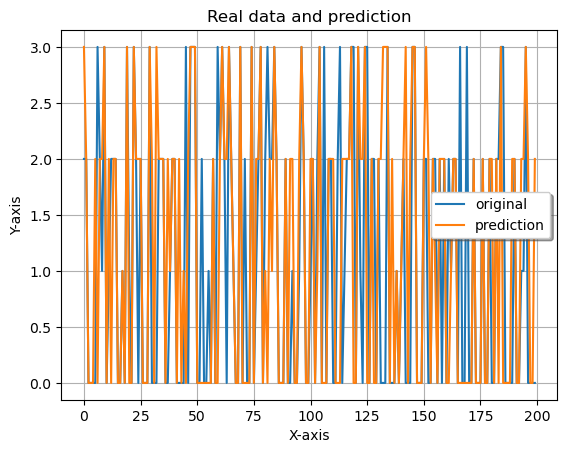

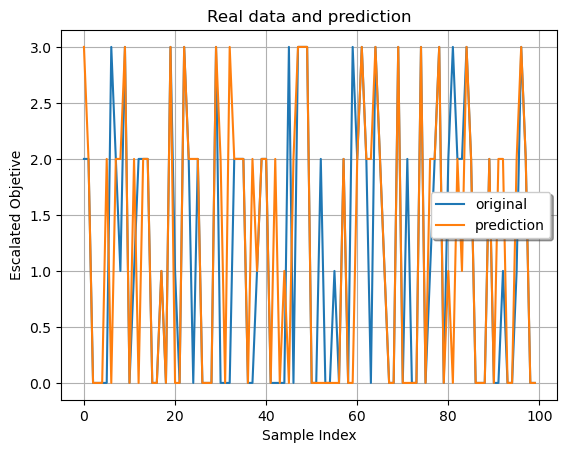

In [ ]:
graph_prediction(classifier=RegLog)

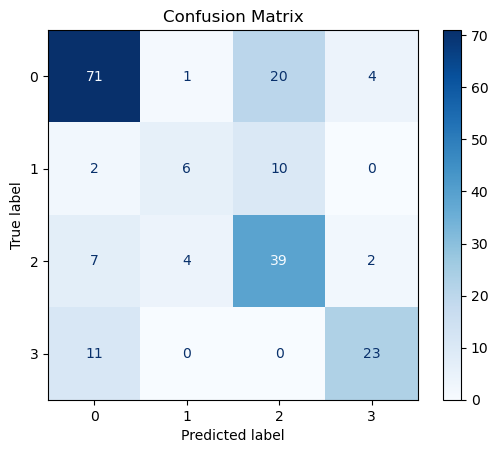

In [ ]:
model_evaluation(classifier=RegLog)


Detailled Errors:
      Actual  Prediction  Error
3         2           0   True
10        2           0   True
17        0           2   True
22        2           0   True
27        3           2   True
..      ...         ...    ...
982       2           1   True
984       0           3   True
994       3           0   True
995       2           0   True
998       3           0   True

[296 rows x 3 columns]


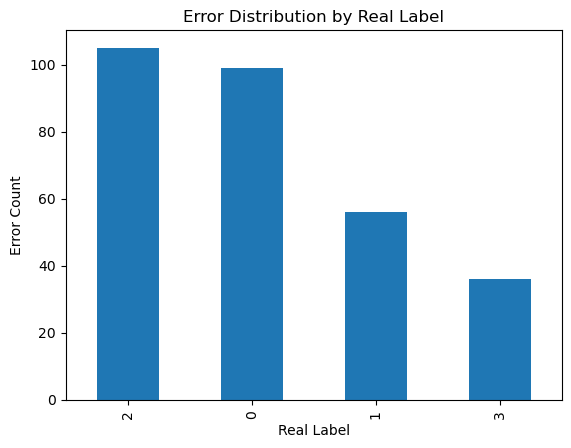

In [ ]:
model_errors(classifier=RegLog)

#### Feature Importances

In [ ]:
# Obtain model coeficients
coeficients = RegLog.coef_[0]

# Create a dataframe to visualize the importance
importance_var_reglog = pd.DataFrame({
    'Feature': data.drop('Health_Status', axis=1).columns,
    'Importance': coeficients
}).sort_values(by='Importance', ascending=False)

print(importance_var_reglog)

                    Feature  Importance
4               Tree_Height    0.118339
13                  Soil_AP    0.097846
3                       DBH    0.068887
6     Crown_Width_East_West    0.065829
8                 Elevation    0.062609
2                 Longitude    0.058732
18          Fire_Risk_Index    0.027496
9               Temperature    0.023475
12                  Soil_TP    0.017878
7                     Slope    0.009707
15          Menhinick_Index    0.007648
14                  Soil_AN   -0.014044
10                 Humidity   -0.035104
1                  Latitude   -0.043682
5   Crown_Width_North_South   -0.045545
11                  Soil_TN   -0.055117
0                   Plot_ID   -0.056962
16            Gleason_Index   -0.370752
17        Disturbance_Level   -0.732665


## KNN

In [ ]:
knn = KNeighborsClassifier()

# Train
knn.fit(xtrain,ytrain)

# Predict
prediction = knn.predict(xtest)

In [ ]:
model_metrics(classifier=knn, model_name='KNN')

Accuracy :  57.00%
Precision :  57.50%
Recall :  57.00%
F1 Score :  54.08%
Cross Validation Score :  56.88%


array([0, 3, 0, 2, 0, 1, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 3, 2, 0,
       2, 0, 0, 2, 0, 0, 2, 3, 0, 0, 0, 1, 2, 0, 0, 0, 1, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 3, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 2, 3, 0, 0, 0, 2, 1, 0, 0, 0, 0,
       0, 2, 0, 0, 1, 2, 0, 0, 0, 1, 3, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2,
       2, 2, 0, 0, 2, 0, 2, 2, 3, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 1, 0, 2, 3, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0,
       0, 0, 0, 2, 1, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 3, 0, 0, 2, 0, 0, 0,
       0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 3, 0, 0, 2, 3, 2, 0,
       0, 0])

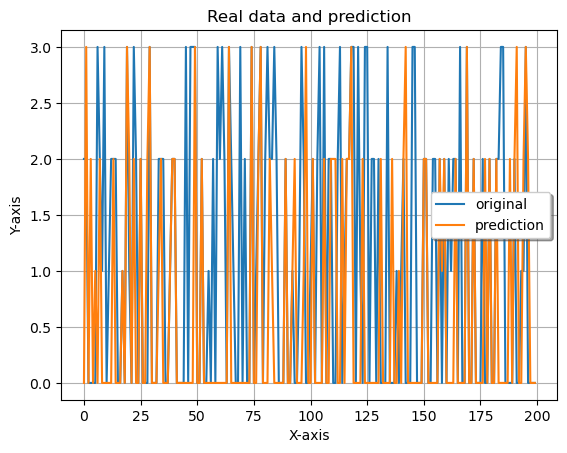

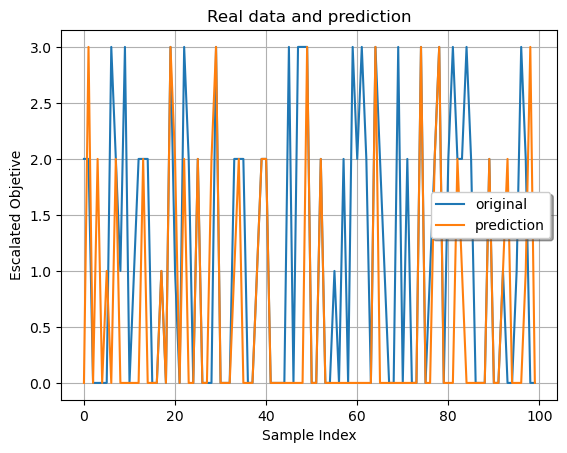

In [ ]:
graph_prediction(classifier=knn)

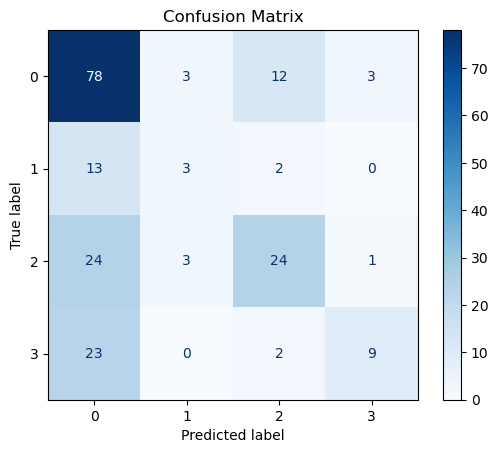

In [ ]:
model_evaluation(classifier=knn)


Detailled Errors:
      Actual  Prediction  Error
0         0           3   True
3         2           0   True
8         0           2   True
10        2           0   True
13        2           0   True
..      ...         ...    ...
990       0           3   True
992       3           0   True
994       3           0   True
995       2           0   True
998       3           0   True

[447 rows x 3 columns]


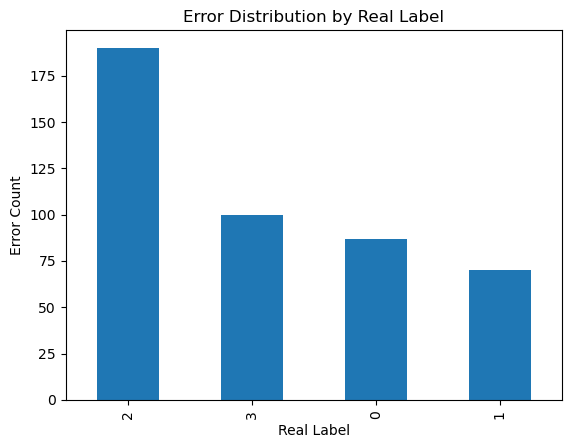

In [ ]:
model_errors(classifier=knn)

#### Feature importances

In [ ]:
# Calculate the importance by permutation
result = permutation_importance(knn, xtest, ytest, n_repeats=10, random_state=42)

# Create a dataframe to visualize the importance
importance_var_knn = pd.DataFrame({
    'Feature': data.drop('Health_Status', axis=1).columns,
    'Importance': result.importances_mean
}).sort_values(by='Importance', ascending=False)

print(importance_var_knn)

                    Feature  Importance
17        Disturbance_Level      0.0990
16            Gleason_Index      0.0790
4               Tree_Height      0.0330
3                       DBH      0.0205
2                 Longitude      0.0185
1                  Latitude      0.0120
6     Crown_Width_East_West      0.0065
18          Fire_Risk_Index      0.0020
15          Menhinick_Index      0.0005
10                 Humidity     -0.0050
12                  Soil_TP     -0.0080
8                 Elevation     -0.0090
0                   Plot_ID     -0.0115
9               Temperature     -0.0150
11                  Soil_TN     -0.0200
14                  Soil_AN     -0.0220
5   Crown_Width_North_South     -0.0255
13                  Soil_AP     -0.0280
7                     Slope     -0.0355


## Decision tree

In [ ]:
dtr=tree.DecisionTreeClassifier()

# Train
dtr.fit(xtrain,ytrain)

# Predict
prediction = dtr.predict(xtest)

In [ ]:
model_metrics(classifier=dtr, model_name='Decision Tree')

Accuracy :  98.50%
Precision :  98.48%
Recall :  98.50%
F1 Score :  98.48%
Cross Validation Score :  99.58%


array([2, 2, 0, 0, 0, 0, 3, 2, 1, 3, 0, 1, 2, 2, 2, 0, 0, 1, 0, 3, 1, 0,
       3, 2, 0, 2, 0, 0, 0, 3, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 2, 0, 0, 0,
       0, 3, 0, 3, 3, 3, 0, 0, 2, 0, 0, 1, 0, 2, 0, 3, 2, 3, 2, 0, 3, 2,
       1, 0, 0, 3, 0, 2, 0, 0, 3, 0, 1, 2, 3, 0, 2, 3, 2, 2, 3, 2, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 3, 2, 0, 0, 1, 2, 0, 2, 3, 0, 3, 0, 2, 2,
       0, 0, 2, 3, 0, 1, 2, 2, 3, 3, 0, 3, 1, 0, 3, 3, 0, 2, 2, 0, 2, 0,
       0, 0, 3, 0, 0, 0, 1, 0, 1, 2, 0, 0, 0, 3, 3, 0, 0, 0, 2, 2, 0, 0,
       2, 2, 0, 2, 0, 2, 0, 2, 1, 2, 2, 0, 3, 0, 0, 3, 0, 0, 2, 0, 0, 0,
       2, 0, 0, 2, 0, 0, 2, 2, 3, 3, 0, 0, 0, 0, 2, 0, 0, 1, 1, 3, 0, 1,
       0, 0])

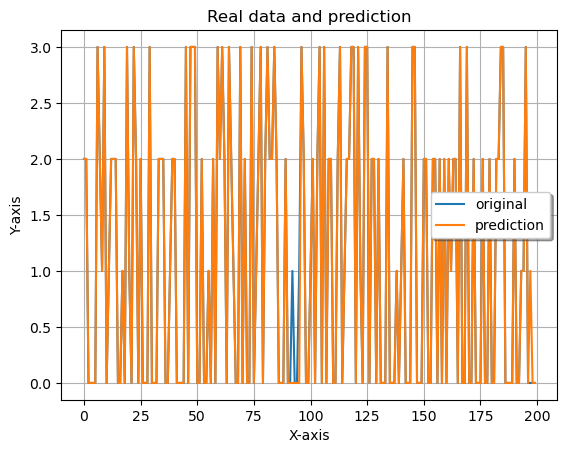

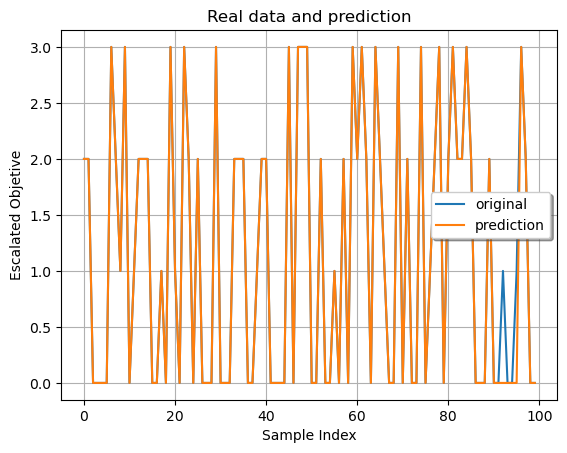

In [ ]:
graph_prediction(classifier=dtr)

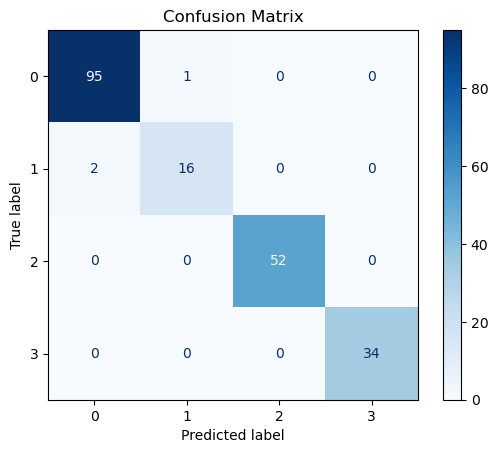

In [ ]:
model_evaluation(classifier=dtr)


Detailled Errors:
     Actual  Prediction  Error
53       0           1   True


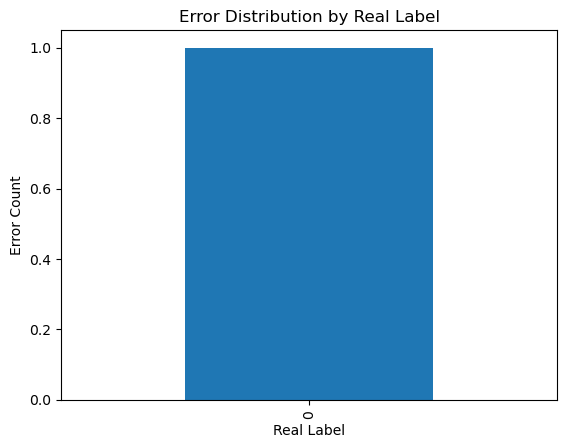

In [ ]:
model_errors(classifier=dtr)

#### Feature importances

In [ ]:
importancia_var_dtr=pd.DataFrame(dtr.feature_importances_)
importancia_var_dtr.index=(data.drop('Health_Status', axis=1).columns)
print(importancia_var_dtr)

                                0
Plot_ID                  0.000000
Latitude                 0.000000
Longitude                0.000000
DBH                      0.000000
Tree_Height              0.240107
Crown_Width_North_South  0.000000
Crown_Width_East_West    0.000000
Slope                    0.002485
Elevation                0.000000
Temperature              0.000000
Humidity                 0.000000
Soil_TN                  0.000000
Soil_TP                  0.000000
Soil_AP                  0.000000
Soil_AN                  0.001225
Menhinick_Index          0.000000
Gleason_Index            0.384763
Disturbance_Level        0.371419
Fire_Risk_Index          0.000000


## Naive Bayes

In [ ]:
gnb = GaussianNB()

# Train
gnb.fit(xtrain,ytrain)

# Predict
prediction = gnb.predict(xtest)

In [ ]:
model_metrics(classifier=gnb, model_name='Naive Bayes')

Accuracy :  82.00%
Precision :  83.04%
Recall :  82.00%
F1 Score :  82.29%
Cross Validation Score :  77.50%


array([3, 2, 0, 0, 0, 2, 2, 2, 1, 3, 0, 1, 0, 2, 2, 0, 0, 1, 0, 3, 1, 0,
       3, 1, 2, 2, 0, 0, 0, 3, 0, 0, 0, 2, 2, 2, 0, 2, 1, 2, 2, 0, 0, 0,
       0, 3, 2, 3, 3, 3, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 3, 2, 2, 3, 2,
       1, 0, 0, 3, 0, 0, 0, 0, 3, 0, 1, 2, 3, 0, 2, 3, 2, 1, 3, 2, 0, 0,
       0, 2, 0, 2, 1, 0, 0, 2, 0, 2, 0, 0, 1, 2, 0, 2, 3, 0, 2, 0, 2, 2,
       2, 0, 0, 3, 0, 1, 2, 2, 3, 0, 0, 3, 1, 2, 3, 0, 0, 2, 0, 0, 2, 2,
       0, 0, 3, 0, 0, 0, 1, 0, 1, 2, 3, 0, 0, 3, 3, 0, 0, 0, 2, 3, 2, 0,
       2, 2, 0, 2, 2, 2, 0, 2, 1, 2, 2, 0, 3, 0, 0, 3, 0, 0, 2, 0, 0, 0,
       2, 0, 2, 2, 2, 0, 2, 0, 3, 3, 0, 0, 0, 0, 2, 0, 0, 2, 0, 3, 2, 0,
       0, 2])

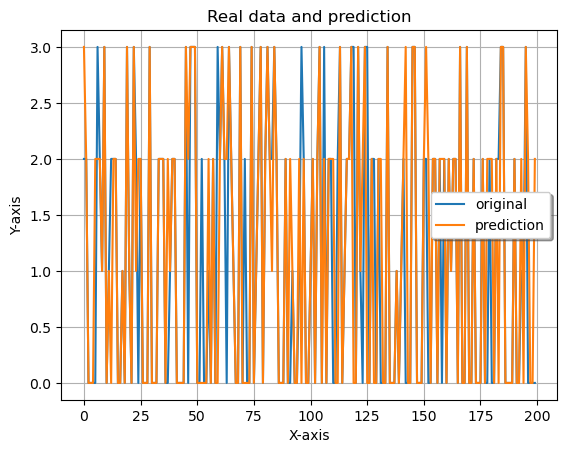

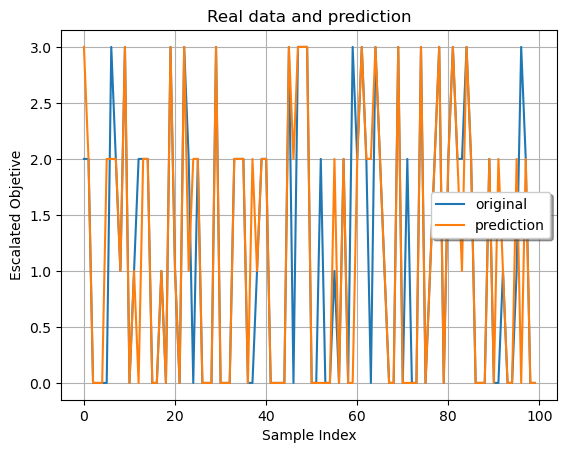

In [ ]:
graph_prediction(classifier=gnb)

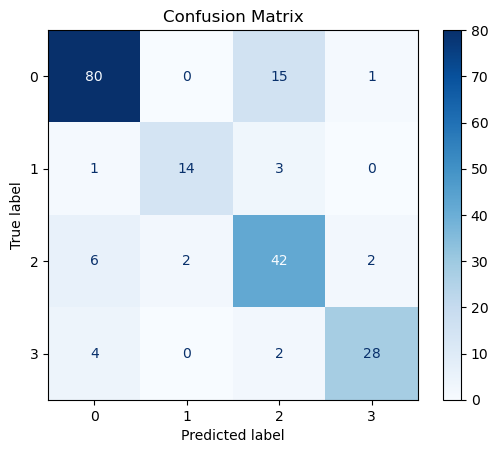

In [ ]:
model_evaluation(classifier=gnb)


Detailled Errors:
      Actual  Prediction  Error
3         2           0   True
10        2           0   True
17        0           2   True
21        0           2   True
22        2           0   True
..      ...         ...    ...
972       1           2   True
979       0           2   True
994       3           0   True
995       2           0   True
998       3           2   True

[229 rows x 3 columns]


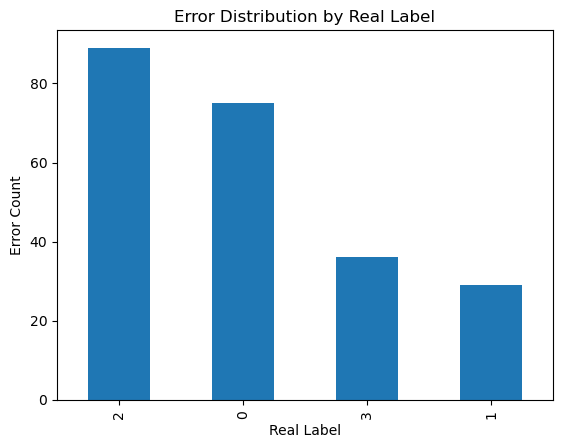

In [ ]:
model_errors(classifier=gnb)

#### Feature importances

In [ ]:
# Calculate the importance by permutation
resultado = permutation_importance(gnb, xtest, ytest, n_repeats=10, random_state=42)

# Create a dataframe to visualize the importance
importancia_var_gnb = pd.DataFrame({
    'Feature': data.drop('Health_Status', axis=1).columns,
    'Importance': resultado.importances_mean
}).sort_values(by='Importance', ascending=False)

print(importancia_var_gnb)

                    Feature    Importance
17        Disturbance_Level  3.020000e-01
4               Tree_Height  1.700000e-01
16            Gleason_Index  1.645000e-01
7                     Slope  1.400000e-02
1                  Latitude  1.050000e-02
9               Temperature  1.050000e-02
18          Fire_Risk_Index  1.000000e-02
3                       DBH  9.000000e-03
14                  Soil_AN  6.500000e-03
15          Menhinick_Index  6.500000e-03
8                 Elevation  6.000000e-03
5   Crown_Width_North_South  5.500000e-03
13                  Soil_AP  4.500000e-03
12                  Soil_TP  4.000000e-03
10                 Humidity  5.000000e-04
2                 Longitude  5.000000e-04
6     Crown_Width_East_West  5.000000e-04
0                   Plot_ID -2.220446e-17
11                  Soil_TN -3.000000e-03


## Random Forest

In [ ]:
RanFo=RandomForestClassifier()

# Train
RanFo.fit(xtrain,ytrain)

# Predict
prediction = RanFo.predict(xtest)

In [ ]:
model_metrics(classifier=RanFo, model_name='Random Forest')

Accuracy :  98.50%
Precision :  98.55%
Recall :  98.50%
F1 Score :  98.44%
Cross Validation Score :  98.46%


array([2, 2, 0, 0, 0, 0, 3, 2, 1, 3, 0, 1, 2, 2, 2, 0, 0, 1, 0, 3, 1, 0,
       3, 2, 0, 2, 0, 0, 0, 3, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 2, 0, 0, 0,
       0, 3, 0, 3, 3, 3, 0, 0, 2, 0, 0, 0, 0, 2, 0, 3, 2, 3, 2, 0, 3, 2,
       1, 0, 0, 3, 0, 2, 0, 0, 3, 0, 1, 2, 3, 0, 2, 3, 2, 2, 3, 2, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 1, 3, 2, 0, 0, 1, 2, 0, 2, 3, 0, 3, 0, 2, 2,
       0, 0, 2, 3, 0, 1, 2, 2, 3, 3, 0, 3, 0, 0, 3, 3, 0, 2, 2, 0, 2, 0,
       0, 0, 3, 0, 0, 0, 1, 0, 1, 2, 0, 0, 0, 3, 3, 0, 0, 0, 2, 2, 0, 0,
       2, 2, 0, 2, 0, 2, 0, 2, 1, 2, 2, 0, 3, 0, 0, 3, 0, 0, 2, 0, 0, 0,
       2, 0, 0, 2, 0, 0, 2, 2, 3, 3, 0, 0, 0, 0, 2, 0, 0, 1, 1, 3, 0, 0,
       0, 0])

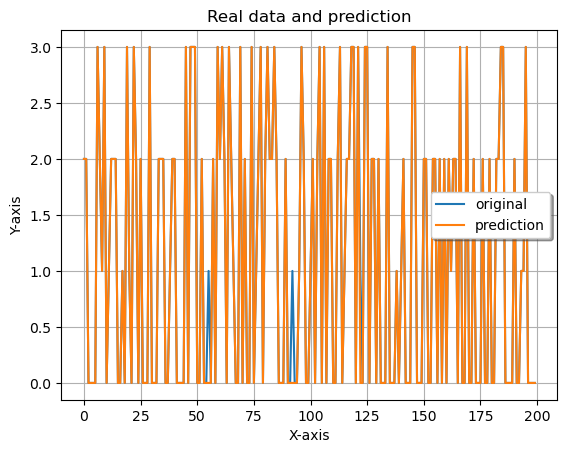

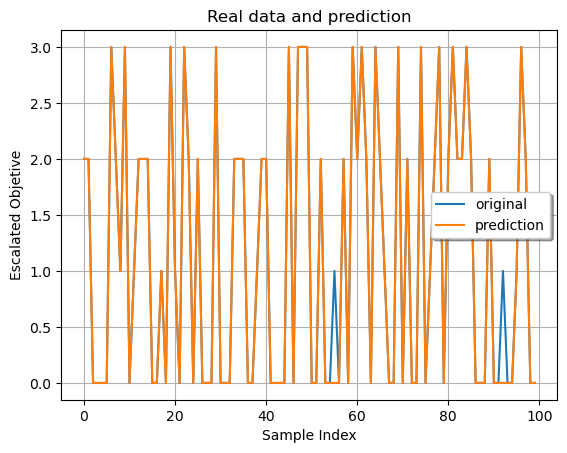

In [ ]:
graph_prediction(classifier=RanFo)

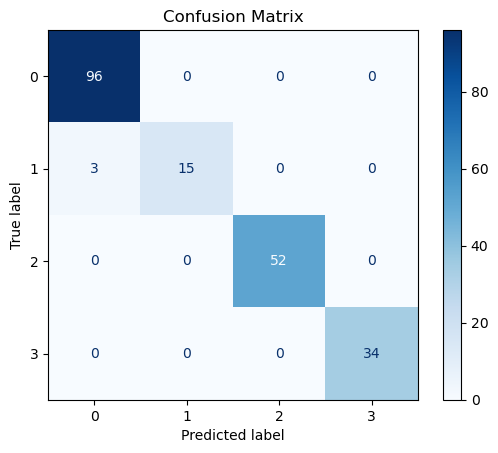

In [ ]:
model_evaluation(classifier=RanFo)


Detailled Errors:
      Actual  Prediction  Error
35        1           0   True
104       1           0   True
107       1           2   True
200       3           0   True
317       1           0   True
344       3           0   True
354       1           0   True
524       1           0   True
545       1           0   True
556       1           0   True
611       1           0   True
625       1           0   True
655       1           0   True
688       1           0   True
708       1           0   True
923       1           0   True
972       1           0   True


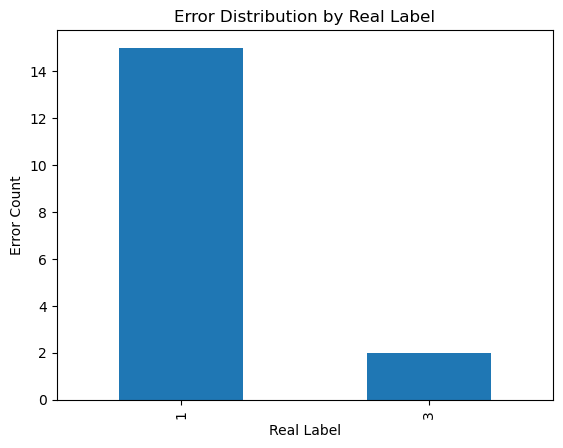

In [ ]:
model_errors(classifier=RanFo)

#### Feature importances

In [ ]:
# Calculate the importance
importancia_var_ranfo = RanFo.feature_importances_

# Name the variables
nombres = data.drop('Health_Status', axis=1).columns

# Importances in descending order
indices = np.argsort(importancia_var_ranfo)[::-1]

# Create the dataframe
feature_importance_df = pd.DataFrame({
    'Feature': nombres[indices],
    'Importance': importancia_var_ranfo[indices]
})

print(feature_importance_df)

                    Feature  Importance
0             Gleason_Index    0.292513
1         Disturbance_Level    0.284816
2               Tree_Height    0.104598
3                  Latitude    0.023520
4                   Soil_AP    0.021601
5                     Slope    0.021431
6           Menhinick_Index    0.020876
7                   Soil_TN    0.020740
8                   Soil_AN    0.020538
9                   Plot_ID    0.020441
10                      DBH    0.019997
11    Crown_Width_East_West    0.019896
12          Fire_Risk_Index    0.019613
13                  Soil_TP    0.019203
14                 Humidity    0.018956
15                Elevation    0.018421
16  Crown_Width_North_South    0.017955
17              Temperature    0.017643
18                Longitude    0.017242


## XGBoost

In [ ]:
xgb = XGBClassifier()

# Train
xgb.fit(xtrain,ytrain)

# Predict
prediction = xgb.predict(xtest)

In [ ]:
model_metrics(classifier=xgb, model_name='XGBoost')

Accuracy :  99.50%
Precision :  99.51%
Recall :  99.50%
F1 Score :  99.50%
Cross Validation Score :  99.38%


array([2, 2, 0, 0, 0, 0, 3, 2, 1, 3, 0, 1, 2, 2, 2, 0, 0, 1, 0, 3, 1, 0,
       3, 2, 0, 2, 0, 0, 2, 3, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 2, 0, 0, 0,
       0, 3, 0, 3, 3, 3, 0, 0, 2, 0, 0, 1, 0, 2, 0, 3, 2, 3, 2, 0, 3, 2,
       1, 0, 0, 3, 0, 2, 0, 0, 3, 0, 1, 2, 3, 0, 2, 3, 2, 2, 3, 2, 0, 0,
       0, 2, 0, 0, 1, 0, 0, 1, 3, 2, 0, 0, 1, 2, 0, 2, 3, 0, 3, 0, 2, 2,
       0, 0, 2, 3, 0, 1, 2, 2, 3, 3, 0, 3, 1, 0, 3, 3, 0, 2, 2, 0, 2, 0,
       0, 0, 3, 0, 0, 0, 1, 0, 1, 2, 0, 0, 0, 3, 3, 0, 0, 0, 2, 2, 0, 0,
       2, 2, 0, 2, 0, 2, 0, 2, 1, 2, 2, 0, 3, 0, 0, 3, 0, 0, 2, 0, 0, 0,
       2, 0, 0, 2, 0, 0, 2, 2, 3, 3, 0, 0, 0, 0, 2, 0, 0, 1, 1, 3, 0, 0,
       0, 0], dtype=int64)

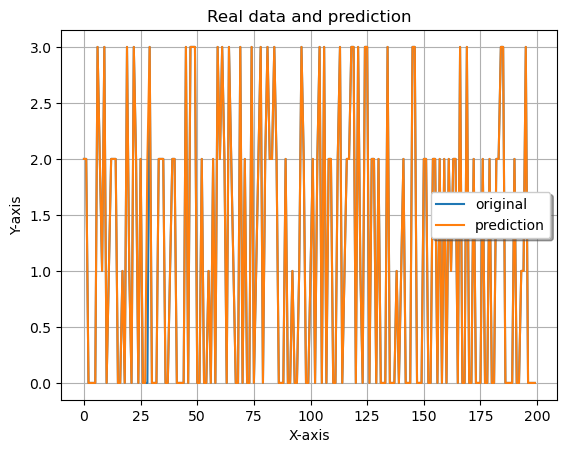

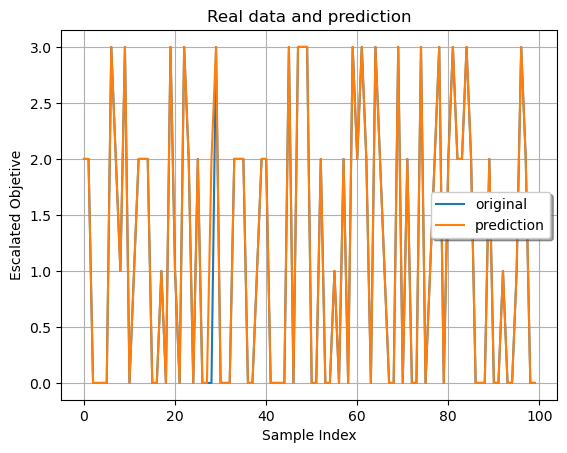

In [ ]:
graph_prediction(classifier=xgb)

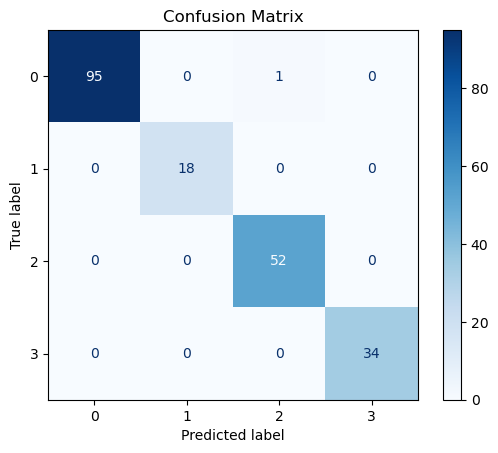

In [ ]:
model_evaluation(classifier=xgb)


Detailled Errors:
      Actual  Prediction  Error
231       0           3   True
371       0           3   True
687       2           0   True
701       2           0   True


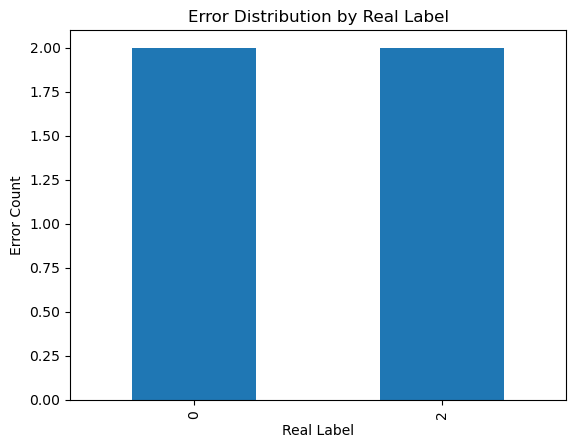

In [ ]:
model_errors(classifier=xgb)

#### Feature importances

In [ ]:
# Obtain feature importances
importancia_var_xgb = xgb.get_booster().get_score(importance_type='weight')

# Create a dataframe to visualize the importance
importance_df = pd.DataFrame({
    'Feature': importancia_var_xgb.keys(),
    'Importance': importancia_var_xgb.values()
}).sort_values(by='Importance', ascending=False)

print(importance_df)

   Feature  Importance
10     f17       187.0
1       f4       182.0
9      f16       170.0
3       f7         9.0
5       f9         6.0
2       f6         4.0
0       f0         3.0
7      f13         3.0
8      f15         3.0
4       f8         1.0
6      f11         1.0


# METRICS

In [ ]:
collect_metrics(metrics)

                 Model  Accuracy  Precision  Recall  F1 Score  \
0  Logistic Regression     0.695   0.705381   0.695  0.693464   
1                  KNN     0.570   0.574997   0.570  0.540759   
2        Decision Tree     0.985   0.984809   0.985  0.984825   
3          Naive Bayes     0.820   0.830405   0.820  0.822853   
4        Random Forest     0.985   0.985455   0.985  0.984434   
5              XGBoost     0.995   0.995094   0.995  0.995011   

   Cross Validation Score  
0                0.693333  
1                0.568750  
2                0.995833  
3                0.775000  
4                0.984583  
5                0.993750  


With these results, the best models (so far) for this dataset are: Decision Tree, Random Forest and XGBoost.